In this project we use california census data set representing some features for severa districts(each districs contains 600 to 3000 people) to predict the exact value for median housing price for unknown districts!   
Firs we have the frame the problem and see whats the problem is about,is it regression or classification,is it supervised or unsupervised or is it ....?   
here we have labeled data so its supervised and also we want to predict the value so its a regression problem.next we have to select a performance measure for project.if the data has lots of outliers its better to measure Mean Absolute error (MAE) otherwise Root Mean Square Error (RMSE) will be better option.(the formulas and explanation to each measures is available in book pages 39 - 42)  
another important thing to consider is checking the assumptions.for example we should be sure about whats the result they want us to gather witch they want to use in another component?!for example if they want us to declare wether a housing price for specific ditrics is cheap expensive or medium or they need the specific price,in first scenario it would be classification problem and will change the whole thing so consider your assumptiona then start building your model!  


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
import matplotlib.pyplot as plt

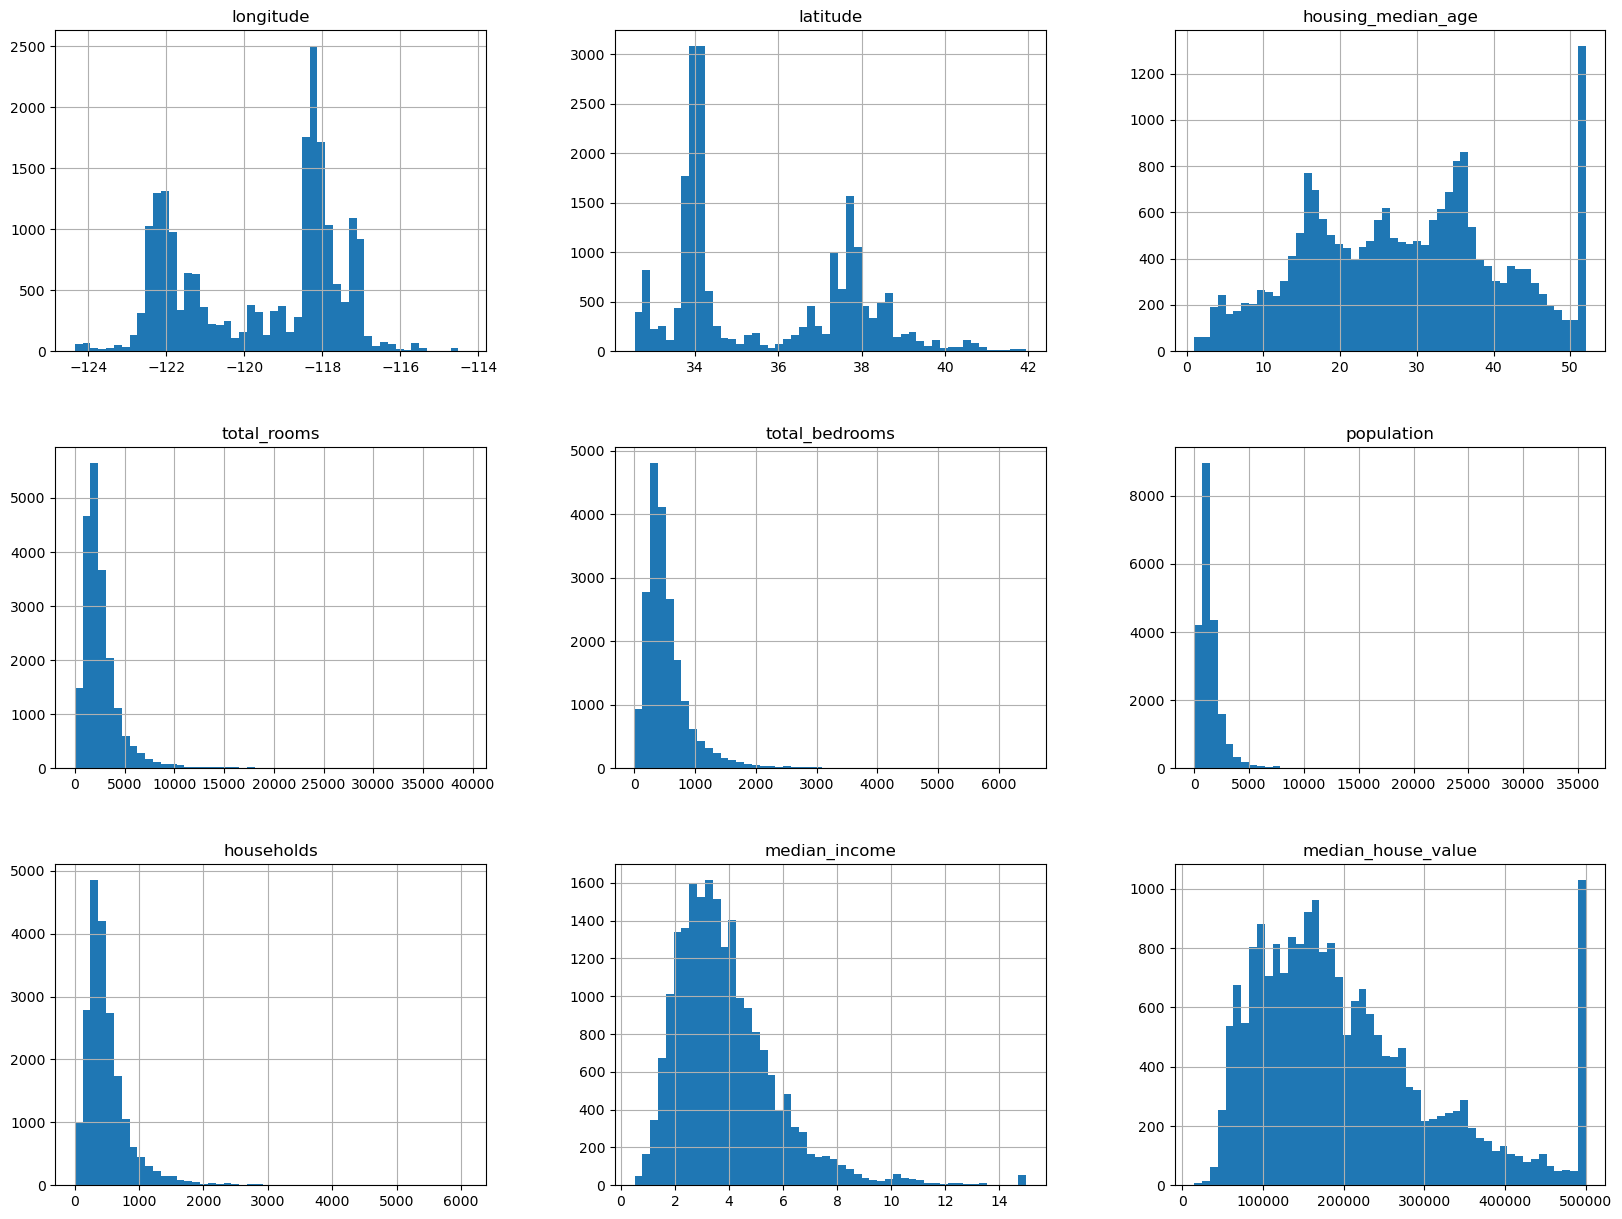

In [8]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

--------------------------   


Custom way to split data into first 80 percent of data into training set and last 20 percent to test set!  


In [9]:
indice = int((len(housing)*80)/100)
train_set = housing[:indice]
test_set = housing[indice:]

In [10]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
16507    -121.03     39.05                12.0       1875.0           307.0   
16508    -118.32     34.20                36.0       2110.0           346.0   
16509    -122.31     37.53                41.0       1608.0           269.0   
16510    -118.13     33.81                34.0       1903.0           343.0   
16511    -118.28     33.92                37.0       1761.0           409.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
16507       806.0       283.0         3.9185            195200.0   
16508       984.0       342.0         6.9909            345300.0   
16509       676.0       267.0         4.6125            361700.0   
16510       928.0       349.0         5.3950            241900.0   
16511      1309.0       357.0         2.1875            175900.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
16507          INLAND  
16508       <1H OCEAN  
16509      NEAR OCEAN  
16510       <1H OCEAN  
16511       <1H OCEAN  

[16512 rows x 10 columns]

In [11]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16512    -122.04     37.24                24.0       1521.0           209.0   
16513    -119.73     36.77                24.0       4410.0           939.0   
16514    -118.25     34.07                43.0        764.0           322.0   
16515    -118.28     34.11                52.0       1803.0           437.0   
16516    -121.99     38.48                17.0       1824.0           348.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
16512       539.0       192.0        11.1557            500001.0   
16513      2362.0       862.0         2.9406             73000.0   
16514      1275.0       306.0         2.0000            175000.0   
16515       787.0       388.0         4.5781            360500.0   
16516       934.0       305.0         4.6719            250000.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
16512       <1H OCEAN  
16513          INLAND  
16514       <1H OCEAN  
16515       <1H OCEAN  
16516          INLAND  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[4128 rows x 10 columns]

-----------------------------   
the better option is to use sckitlearn in order to split data :   

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set , test_set = train_test_split(housing, test_size=0.2,random_state=42)

In [14]:
train_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   
...          ...       ...                 ...          ...             ...   
11284    -122.37     37.94                49.0        969.0           229.0   
11964    -118.38     33.89                35.0       1778.0           330.0   
5390     -119.33     36.28                16.0       2624.0           527.0   
860      -117.19     34.08                22.0       2467.0           555.0   
15795    -118.86     34.22                22.0       1230.0           200.0   

       population  households  median_income  median_house_value  \
14196      2654.0      1072.0         4.5878            291000.0   
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   
...           ...         ...            ...                 ...   
11284       599.0       195.0         1.3167             71600.0   
11964       732.0       312.0         6.5745            379300.0   
5390       1077.0       520.0         2.1250            104200.0   
860        1567.0       494.0         2.6536             84700.0   
15795       673.0       195.0         6.2708            251400.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445        NEAR BAY  
14265       <1H OCEAN  
2271           INLAND  
...               ...  
11284        NEAR BAY  
11964       <1H OCEAN  
5390           INLAND  
860            INLAND  
15795       <1H OCEAN  

[16512 rows x 10 columns]

In [15]:
test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -122.38     40.67                10.0       2281.0           444.0   
3024     -118.37     33.83                35.0       1207.0           207.0   
15663    -117.24     32.72                39.0       3089.0           431.0   
20484    -118.44     34.05                18.0       4780.0          1192.0   
9814     -118.44     34.18                33.0       2127.0           414.0   
...          ...       ...                 ...          ...             ...   
15362    -121.92     40.52                13.0       4581.0           881.0   
16623    -122.08     37.68                26.0       2607.0           682.0   
18086    -119.00     35.39                42.0       2839.0           516.0   
2144     -117.92     33.63                39.0       1469.0           226.0   
3665     -118.39     34.02                38.0       2447.0           636.0   

       population  households  median_income  median_house_value  \
20046      1274.0       438.0         2.2120             65600.0   
3024        601.0       213.0         4.7308            353400.0   
15663      1175.0       432.0         7.5925            466700.0   
20484      1886.0      1036.0         4.4674            500001.0   
9814       1056.0       391.0         4.3750            286100.0   
...           ...         ...            ...                 ...   
15362      1799.0       734.0         2.2993             99500.0   
16623      1401.0       607.0         2.6563            184100.0   
18086      1203.0       487.0         3.7708             79400.0   
2144        553.0       225.0         7.8496            490800.0   
3665       1312.0       574.0         3.5909            279400.0   

      ocean_proximity  
20046          INLAND  
3024        <1H OCEAN  
15663      NEAR OCEAN  
20484       <1H OCEAN  
9814        <1H OCEAN  
...               ...  
15362          INLAND  
16623        NEAR BAY  
18086          INLAND  
2144        <1H OCEAN  
3665        <1H OCEAN  

[4128 rows x 10 columns]

In [16]:
housing = train_set.copy()

In [17]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.22     32.75                34.0       6001.0          1111.0   
8267     -117.03     32.69                10.0        901.0           163.0   
17445    -122.27     37.74                28.0       6909.0          1554.0   
14265    -121.82     37.25                25.0       4021.0           634.0   
2271     -115.98     33.32                 8.0        240.0            46.0   
...          ...       ...                 ...          ...             ...   
11284    -122.37     37.94                49.0        969.0           229.0   
11964    -118.38     33.89                35.0       1778.0           330.0   
5390     -119.33     36.28                16.0       2624.0           527.0   
860      -117.19     34.08                22.0       2467.0           555.0   
15795    -118.86     34.22                22.0       1230.0           200.0   

       population  households  median_income  median_house_value  \
14196      2654.0      1072.0         4.5878            291000.0   
8267        698.0       167.0         4.6648            156100.0   
17445      2974.0      1484.0         3.6875            353900.0   
14265      2178.0       650.0         5.1663            241200.0   
2271         63.0        24.0         1.4688             53800.0   
...           ...         ...            ...                 ...   
11284       599.0       195.0         1.3167             71600.0   
11964       732.0       312.0         6.5745            379300.0   
5390       1077.0       520.0         2.1250            104200.0   
860        1567.0       494.0         2.6536             84700.0   
15795       673.0       195.0         6.2708            251400.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445        NEAR BAY  
14265       <1H OCEAN  
2271           INLAND  
...               ...  
11284        NEAR BAY  
11964       <1H OCEAN  
5390           INLAND  
860            INLAND  
15795       <1H OCEAN  

[16512 rows x 10 columns]

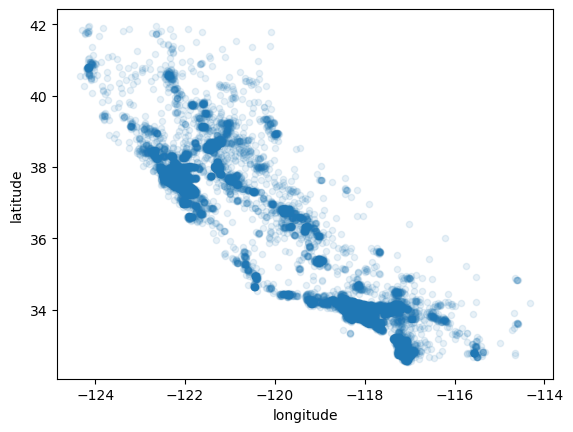

In [18]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
plt.show()

-------------------   
The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):

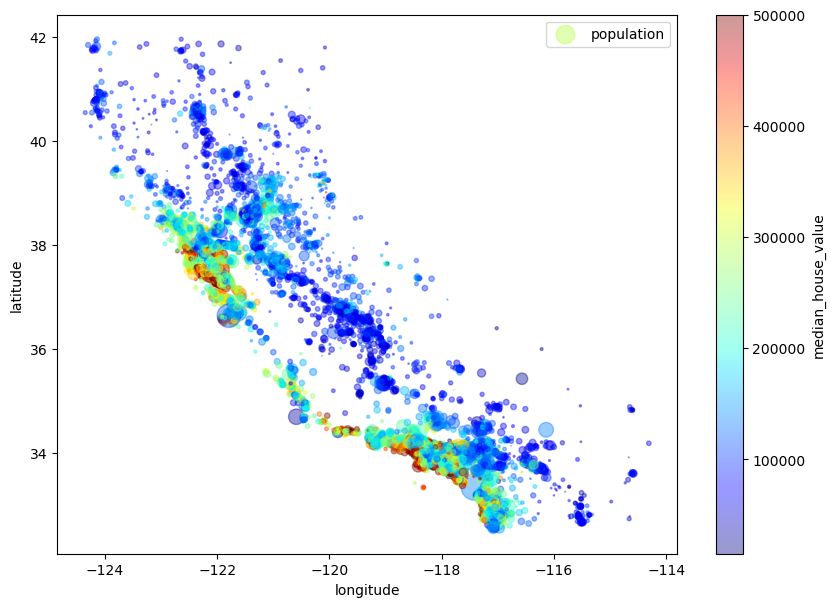

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4
             ,s=housing["population"]/100,label = "population"
             ,figsize=(10,7),c = "median_house_value"
             ,cmap = plt.get_cmap("jet"),colorbar=True)
plt.legend()

now we can calculate standard correlation betweed numerical values!

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924341           -0.110786     0.043100   
latitude            -0.924341  1.000000            0.012640    -0.036327   
housing_median_age  -0.110786  0.012640            1.000000    -0.362433   
total_rooms          0.043100 -0.036327           -0.362433     1.000000   
total_bedrooms       0.069439 -0.069283           -0.318544     0.928199   
population           0.100706 -0.110514           -0.291842     0.851766   
households           0.056318 -0.073915           -0.301198     0.916265   
median_income       -0.014592 -0.079259           -0.118410     0.197326   
median_house_value  -0.043603 -0.146324            0.104714     0.134060   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069439    0.100706    0.056318      -0.014592   
latitude                 -0.069283   -0.110514   -0.073915      -0.079259   
housing_median_age       -0.318544   -0.291842   -0.301198      -0.118410   
total_rooms               0.928199    0.851766    0.916265       0.197326   
total_bedrooms            1.000000    0.873484    0.979627      -0.011782   
population                0.873484    1.000000    0.903045       0.000883   
households                0.979627    0.903045    1.000000       0.009366   
median_income            -0.011782    0.000883    0.009366       1.000000   
median_house_value        0.049993   -0.025820    0.065798       0.687013   

                    median_house_value  
longitude                    -0.043603  
latitude                     -0.146324  
housing_median_age            0.104714  
total_rooms                   0.134060  
total_bedrooms                0.049993  
population                   -0.025820  
households                    0.065798  
median_income                 0.687013  
median_house_value            1.000000

In [22]:
#lets see how much all attributes correlates with median house value!

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

In [23]:
#correlation coeficiance is measered between -1 , 1,where 1 means the strongest positive correlation between attributes
#while zero means there is no correlation at all

Another way to check for correlation between attributes is to use Pandas’
scatter_matrix function, which plots every numerical attribute against every other
numerical attribute. Since there are now 11 numerical attributes, you would get 112 =
121 plots, which would not fit on a page, so let’s just focus on a few promising
attributes that seem most correlated with the median housing value

In [24]:
from pandas.plotting import scatter_matrix

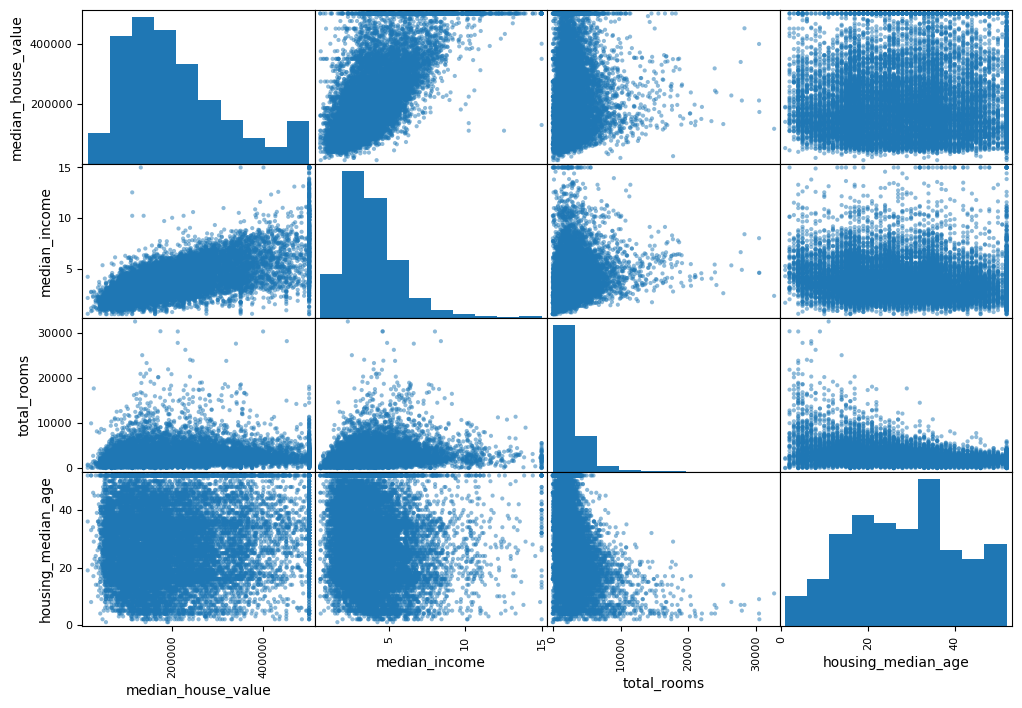

In [25]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

----------------  
extraction of new attributes to check on!

In [26]:
housing["rooms_per_households"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [27]:
corr_matrix=housing.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687013
rooms_per_households        0.146940
total_rooms                 0.134060
housing_median_age          0.104714
households                  0.065798
total_bedrooms              0.049993
population_per_household   -0.021577
population                 -0.025820
longitude                  -0.043603
latitude                   -0.146324
bedrooms_per_room          -0.254817
Name: median_house_value, dtype: float64

Most Machine Learning algorithms cannot work with missing features, so let’s create  
a few functions to take care of them. You noticed earlier that the total_bedrooms  
attribute has some missing values, so let’s fix this. You have three options:  
• Get rid of the corresponding districts.  
• Get rid of the whole attribute.  
• Set the values to some value (zero, the mean, the median, etc.).  
You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()  
methods:  

In [29]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

---------------------  
Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
Here is how to use it. First, you need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute:

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [33]:
imputer

SimpleImputer(strategy='median')

In [34]:
housnig

NameError: name 'housnig' is not defined